In [1]:
!pip install pycaret[full]
!pip install opendatasets
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
import pycaret
pycaret.__version__

'3.3.2'

In [4]:
!kaggle datasets download -d arshid/iris-flower-dataset
!unzip iris-flower-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0
  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 2.46MB/s]
Archive:  iris-flower-dataset.zip
  inflating: IRIS.csv                


In [5]:
import pandas as pd
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 7)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [7]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5426,481.5215,0.7051,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [9]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6223,576.5206,0.5859,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,Cluster 1
1,4.9,3.0,1.4,0.2,Iris-setosa,Cluster 1
2,4.7,3.2,1.3,0.2,Iris-setosa,Cluster 1
3,4.6,3.1,1.5,0.2,Iris-setosa,Cluster 1
4,5.0,3.6,1.4,0.2,Iris-setosa,Cluster 1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Cluster 0
146,6.3,2.5,5.0,1.9,Iris-virginica,Cluster 0
147,6.5,3.0,5.2,2.0,Iris-virginica,Cluster 0
148,6.2,3.4,5.4,2.3,Iris-virginica,Cluster 0


In [11]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

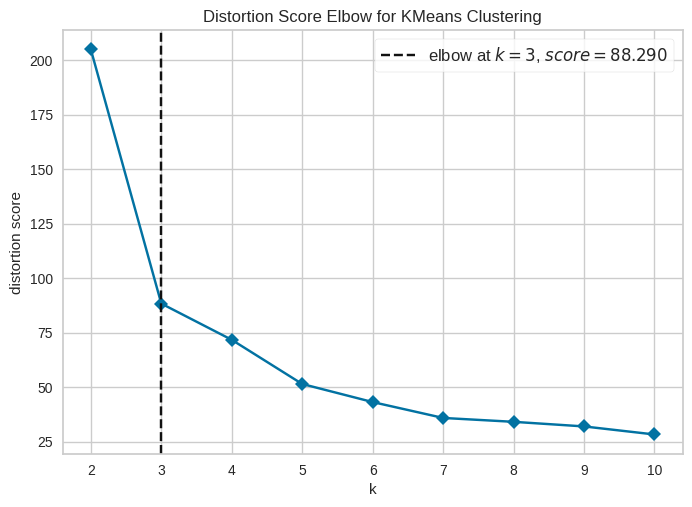

In [12]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

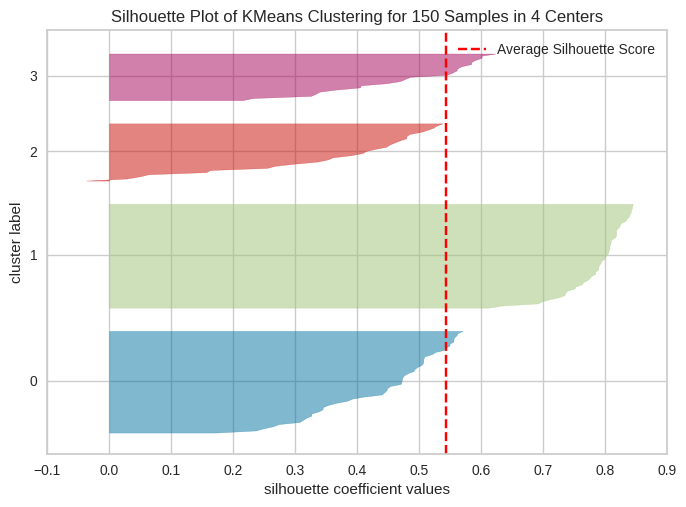

In [13]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [15]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=df)
kmeans_pred

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Cluster
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0,Cluster 1
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0,Cluster 1
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0,Cluster 1
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0,Cluster 1
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0,Cluster 1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0,Cluster 0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0,Cluster 0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0,Cluster 0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0,Cluster 0


In [16]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['species'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['species'],
                                     transformer=OneHotEncoder(cols=['species'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'kmeans_pipeline.pkl')

In [17]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['species'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['species'],
                                    transformer=OneHotEncoder(cols=['species'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])